In [1]:
def get_reward(X_n):
    A = 4000
    reward = []

    # 繁忙时期 qubit较少 a>b>c>d

    # route a, 1 hop, 2 edges
    # 单跳单qubit单次纠缠成功率
    pe_a_1 = 1.5e-4
    pe_a_2 = 1.5e-4
    # 单跳单qubit单slot(A次)纠缠成功率
    p_a_1 = 1 - (1 - pe_a_1)**A
    p_a_2 = 1 - (1 - pe_a_2)**A
#     # 单跳qubit数量
#     n_a_1 = 4
#     n_a_2 = 4
    # 单跳成功率
    for j in range(len(X_n)):
#         P_a_1 = 1 - (1 - p_a_1)**n_a_1
#         P_a_2 = 1 - (1 - p_a_2)**n_a_2
        P_a_1 = 1 - (1 - p_a_1)**X_n[j][0]
        P_a_2 = 1 - (1 - p_a_2)**X_n[j][1]
        # route a 成功率
        P_a = P_a_1 * P_a_2
        reward.append(P_a)
    return reward

In [2]:
from env import *
from neuralucb import *
import matplotlib.pyplot as plt
import torch
from tqdm import trange
import random



X_n = []
qubit = 8
for i in range(qubit+1):
    new_d = np.array([i,qubit-i])
    X_n.append(new_d)
X_n = np.array(X_n)

# for i in range(3):
#     front = np.zeros((4 * i))
#     back = np.zeros((4 * (2 - i)))
#     new_d = np.concatenate((front, x, back), axis=0)
#     X_n.append(new_d)
# X_n = np.array(X_n)

neuralucb = NeuralUCB(2, len(X_n), beta=1, lamb=1)
NeuralUCBregret_list = []
NeuralUCBregret = 0
# NeuralTSregret = [0]

context = X_n
reward = get_reward(X_n)
print(X_n)
print(reward)
for i in trange(10000):
#     context, reward = env.step()
    arm = neuralucb.take_action(context)
#     X_t = np.random.binomial(1, reward[arm])
    X_t = np.random.choice([0,1],p=[1-reward[arm], reward[arm]])
    print('reward[arm]:',reward[arm])
#     X_t = random.choices([0, 1], weights=[1-reward[arm], reward[arm]], k=1)[0]
#     NeuralTSregret += [NeuralTSregret[-1] + max(reward) - reward[arm]]
    NeuralUCBregret = NeuralUCBregret +  max(reward) - reward[arm]
    NeuralUCBregret_list.append(NeuralUCBregret)
#     neuralucb.update(context, arm, reward[arm])
    neuralucb.update(context, arm, X_t)


# plt.plot(NeuralUCBregret, label='NeuralUCB')
# print('neuralucb:', NeuralUCBregret[-1])

[[0 8]
 [1 7]
 [2 6]
 [3 5]
 [4 4]
 [5 3]
 [6 2]
 [7 1]
 [8 0]]
[0.0, 0.4444489934354188, 0.6797433363344736, 0.7931743460131145, 0.8268235367879645, 0.7931743460131145, 0.6797433363344736, 0.4444489934354188, 0.0]


  0%|                                                                               | 10/10000 [00:00<01:46, 94.09it/s]

reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0


  0%|▏                                                                             | 22/10000 [00:00<01:35, 104.00it/s]

reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0


  0%|▎                                                                             | 33/10000 [00:00<01:33, 106.62it/s]

reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0


  1%|▍                                                                             | 60/10000 [00:00<01:27, 114.12it/s]

reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.6797433363344736


  1%|▌                                                                             | 72/10000 [00:00<01:28, 112.46it/s]

reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0


  1%|▋                                                                             | 84/10000 [00:00<01:27, 112.76it/s]

reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0


  1%|▋                                                                             | 96/10000 [00:00<01:29, 110.26it/s]

reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0


  1%|▊                                                                            | 108/10000 [00:00<01:27, 112.99it/s]

reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0


  1%|▉                                                                            | 120/10000 [00:01<01:28, 111.49it/s]

reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.0


  1%|█                                                                            | 144/10000 [00:01<01:29, 109.60it/s]

reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.0
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736


  2%|█▎                                                                           | 168/10000 [00:01<01:26, 113.05it/s]

reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736


  2%|█▍                                                                           | 180/10000 [00:01<01:26, 112.94it/s]

reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.7931743460131145
reward[arm]: 0.6797433363344736
reward[arm]: 0.6797433363344736
reward[arm]: 0.7931743460131145
reward[arm]: 0.6797433363344736
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.6797433363344736
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.6797433363344736
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  2%|█▍                                                                           | 192/10000 [00:01<01:27, 111.61it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  2%|█▌                                                                           | 204/10000 [00:01<01:27, 111.86it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  2%|█▋                                                                           | 227/10000 [00:02<01:31, 106.77it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  3%|█▉                                                                           | 252/10000 [00:02<01:28, 110.51it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  3%|██                                                                           | 264/10000 [00:02<01:30, 107.66it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  3%|██                                                                           | 275/10000 [00:02<01:31, 105.74it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  3%|██▏                                                                          | 286/10000 [00:02<01:32, 104.72it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  3%|██▎                                                                          | 298/10000 [00:02<01:29, 108.67it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  3%|██▍                                                                          | 310/10000 [00:02<01:27, 110.38it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145


  3%|██▌                                                                          | 334/10000 [00:03<01:25, 112.95it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645


  4%|██▊                                                                          | 358/10000 [00:03<01:24, 113.48it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145


  4%|██▉                                                                          | 382/10000 [00:03<01:26, 111.70it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  4%|███                                                                          | 394/10000 [00:03<01:27, 110.03it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145


  4%|███▏                                                                         | 418/10000 [00:03<01:27, 109.13it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  4%|███▍                                                                         | 443/10000 [00:04<01:24, 112.74it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  5%|███▌                                                                         | 455/10000 [00:04<01:26, 110.09it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  5%|███▋                                                                         | 478/10000 [00:04<01:27, 108.74it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  5%|███▊                                                                         | 501/10000 [00:04<01:28, 107.63it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  5%|████                                                                         | 523/10000 [00:04<01:30, 104.81it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  5%|████▏                                                                        | 545/10000 [00:04<01:29, 105.47it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  6%|████▎                                                                        | 556/10000 [00:05<01:28, 106.50it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  6%|████▎                                                                        | 567/10000 [00:05<01:29, 105.64it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


  6%|████▍                                                                        | 578/10000 [00:05<01:28, 106.50it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  6%|████▌                                                                        | 589/10000 [00:05<01:28, 105.95it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  6%|████▋                                                                        | 602/10000 [00:05<01:25, 109.64it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  6%|████▋                                                                        | 613/10000 [00:05<01:26, 109.09it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  6%|████▊                                                                        | 627/10000 [00:05<01:22, 113.61it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  6%|████▉                                                                        | 639/10000 [00:05<01:22, 113.45it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  7%|█████                                                                        | 651/10000 [00:05<01:24, 111.09it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  7%|█████                                                                        | 663/10000 [00:06<01:26, 108.52it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  7%|█████▏                                                                       | 675/10000 [00:06<01:25, 109.65it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  7%|█████▎                                                                       | 687/10000 [00:06<01:23, 112.05it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  7%|█████▍                                                                       | 699/10000 [00:06<01:25, 109.14it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  7%|█████▍                                                                       | 711/10000 [00:06<01:26, 107.90it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  7%|█████▌                                                                       | 722/10000 [00:06<01:26, 107.74it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  7%|█████▋                                                                       | 733/10000 [00:06<01:27, 106.00it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  7%|█████▋                                                                       | 744/10000 [00:06<01:27, 105.51it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  8%|█████▊                                                                       | 755/10000 [00:06<01:27, 105.86it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  8%|█████▉                                                                       | 778/10000 [00:07<01:25, 108.35it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  8%|██████                                                                       | 789/10000 [00:07<01:25, 108.32it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  8%|██████▏                                                                      | 801/10000 [00:07<01:24, 109.45it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  8%|██████▎                                                                      | 812/10000 [00:07<01:23, 109.60it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  8%|██████▎                                                                      | 823/10000 [00:07<01:23, 109.70it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  8%|██████▍                                                                      | 834/10000 [00:07<01:26, 105.80it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  8%|██████▌                                                                      | 846/10000 [00:07<01:24, 108.48it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  9%|██████▌                                                                      | 859/10000 [00:07<01:21, 111.52it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  9%|██████▋                                                                      | 871/10000 [00:07<01:23, 108.95it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  9%|██████▊                                                                      | 882/10000 [00:08<01:25, 107.13it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  9%|██████▉                                                                      | 895/10000 [00:08<01:23, 109.06it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  9%|██████▉                                                                      | 906/10000 [00:08<01:23, 108.66it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  9%|███████                                                                      | 917/10000 [00:08<01:24, 108.12it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  9%|███████▏                                                                     | 929/10000 [00:08<01:23, 108.63it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


  9%|███████▎                                                                     | 942/10000 [00:08<01:21, 111.09it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 10%|███████▎                                                                     | 954/10000 [00:08<01:19, 113.28it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 10%|███████▍                                                                     | 966/10000 [00:08<01:21, 111.46it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 10%|███████▌                                                                     | 978/10000 [00:08<01:22, 109.99it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 10%|███████▌                                                                     | 990/10000 [00:09<01:22, 109.32it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 10%|███████▋                                                                    | 1014/10000 [00:09<01:21, 110.35it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 10%|███████▊                                                                    | 1026/10000 [00:09<01:20, 110.95it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 10%|███████▉                                                                    | 1038/10000 [00:09<01:20, 110.86it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 10%|███████▉                                                                    | 1050/10000 [00:09<01:22, 108.37it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 11%|████████                                                                    | 1061/10000 [00:09<01:22, 108.10it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 11%|████████▏                                                                   | 1074/10000 [00:09<01:23, 107.28it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 11%|████████▎                                                                   | 1086/10000 [00:09<01:21, 109.26it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 11%|████████▎                                                                   | 1100/10000 [00:10<01:19, 111.81it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 11%|████████▍                                                                   | 1112/10000 [00:10<01:18, 112.99it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 11%|████████▌                                                                   | 1124/10000 [00:10<01:19, 110.97it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 11%|████████▋                                                                   | 1136/10000 [00:10<01:20, 110.77it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 11%|████████▋                                                                   | 1148/10000 [00:10<01:18, 113.22it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 12%|████████▊                                                                   | 1160/10000 [00:10<01:20, 109.66it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 12%|█████████                                                                   | 1186/10000 [00:10<01:17, 113.84it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 12%|█████████                                                                   | 1198/10000 [00:10<01:19, 110.30it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 12%|█████████▏                                                                  | 1210/10000 [00:11<01:21, 107.40it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 12%|█████████▎                                                                  | 1221/10000 [00:11<01:21, 107.44it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 12%|█████████▍                                                                  | 1245/10000 [00:11<01:20, 109.34it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 13%|█████████▋                                                                  | 1267/10000 [00:11<01:22, 105.45it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 13%|█████████▊                                                                  | 1291/10000 [00:11<01:19, 109.32it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 13%|█████████▉                                                                  | 1304/10000 [00:11<01:17, 111.69it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 13%|██████████                                                                  | 1329/10000 [00:12<01:17, 112.37it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 14%|██████████▎                                                                 | 1354/10000 [00:12<01:16, 113.43it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 14%|██████████▍                                                                 | 1379/10000 [00:12<01:14, 115.27it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 14%|██████████▌                                                                 | 1391/10000 [00:12<01:13, 116.58it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 14%|██████████▊                                                                 | 1415/10000 [00:12<01:18, 109.00it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 14%|██████████▉                                                                 | 1439/10000 [00:13<01:16, 111.25it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 15%|███████████▏                                                                | 1464/10000 [00:13<01:15, 113.65it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145


 15%|███████████▏                                                                | 1476/10000 [00:13<01:14, 114.16it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 15%|███████████▍                                                                | 1501/10000 [00:13<01:13, 116.02it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


 15%|███████████▌                                                                | 1525/10000 [00:13<01:12, 116.74it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645


 15%|███████████▊                                                                | 1549/10000 [00:14<01:13, 114.75it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645


 16%|███████████▉                                                                | 1573/10000 [00:14<01:13, 114.54it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 16%|████████████▏                                                               | 1597/10000 [00:14<01:14, 112.09it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145


 16%|████████████▎                                                               | 1621/10000 [00:14<01:14, 112.21it/s]

reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 16%|████████████▍                                                               | 1633/10000 [00:14<01:14, 112.25it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 17%|████████████▌                                                               | 1657/10000 [00:15<01:14, 112.67it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.7931743460131145
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 17%|████████████▊                                                               | 1681/10000 [00:15<01:14, 112.27it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 17%|████████████▉                                                               | 1705/10000 [00:15<01:13, 112.35it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 17%|█████████████                                                               | 1717/10000 [00:15<01:13, 113.36it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 17%|█████████████▏                                                              | 1742/10000 [00:15<01:12, 113.98it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 18%|█████████████▍                                                              | 1766/10000 [00:16<01:12, 113.55it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 18%|█████████████▌                                                              | 1790/10000 [00:16<01:11, 115.55it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 18%|█████████████▊                                                              | 1814/10000 [00:16<01:11, 114.55it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 18%|█████████████▉                                                              | 1839/10000 [00:16<01:10, 116.46it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 19%|██████████████                                                              | 1851/10000 [00:16<01:11, 113.61it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 19%|██████████████▎                                                             | 1875/10000 [00:16<01:11, 113.51it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 19%|██████████████▍                                                             | 1899/10000 [00:17<01:10, 115.52it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 19%|██████████████▌                                                             | 1923/10000 [00:17<01:10, 114.47it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 19%|██████████████▊                                                             | 1947/10000 [00:17<01:10, 114.52it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 20%|██████████████▉                                                             | 1971/10000 [00:17<01:09, 116.00it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 20%|███████████████                                                             | 1983/10000 [00:17<01:10, 114.36it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 20%|███████████████▎                                                            | 2007/10000 [00:18<01:10, 113.96it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 20%|███████████████▍                                                            | 2031/10000 [00:18<01:09, 114.72it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 21%|███████████████▌                                                            | 2055/10000 [00:18<01:09, 114.65it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 21%|███████████████▊                                                            | 2079/10000 [00:18<01:07, 116.53it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 21%|███████████████▉                                                            | 2103/10000 [00:18<01:08, 115.41it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 21%|████████████████▏                                                           | 2127/10000 [00:19<01:08, 114.35it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 22%|████████████████▎                                                           | 2151/10000 [00:19<01:08, 114.08it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 22%|████████████████▌                                                           | 2175/10000 [00:19<01:08, 114.64it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 22%|████████████████▋                                                           | 2188/10000 [00:19<01:07, 115.94it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 22%|████████████████▊                                                           | 2212/10000 [00:19<01:07, 114.64it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 22%|████████████████▉                                                           | 2236/10000 [00:20<01:06, 116.38it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 23%|█████████████████▏                                                          | 2260/10000 [00:20<01:07, 114.80it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 23%|█████████████████▎                                                          | 2284/10000 [00:20<01:07, 113.74it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 23%|█████████████████▍                                                          | 2296/10000 [00:20<01:06, 115.00it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 23%|█████████████████▋                                                          | 2320/10000 [00:20<01:07, 114.33it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 23%|█████████████████▊                                                          | 2344/10000 [00:21<01:06, 114.64it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 24%|█████████████████▉                                                          | 2368/10000 [00:21<01:05, 115.98it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 24%|██████████████████▏                                                         | 2392/10000 [00:21<01:06, 114.67it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 24%|██████████████████▎                                                         | 2416/10000 [00:21<01:06, 114.82it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 24%|██████████████████▌                                                         | 2440/10000 [00:21<01:06, 113.83it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 25%|██████████████████▋                                                         | 2464/10000 [00:22<01:06, 112.63it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 25%|██████████████████▊                                                         | 2476/10000 [00:22<01:07, 110.95it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 25%|███████████████████                                                         | 2500/10000 [00:22<01:08, 109.18it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 25%|███████████████████▏                                                        | 2524/10000 [00:22<01:07, 109.94it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 25%|███████████████████▎                                                        | 2536/10000 [00:22<01:08, 108.86it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 26%|███████████████████▍                                                        | 2560/10000 [00:22<01:07, 109.59it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 26%|███████████████████▌                                                        | 2582/10000 [00:23<01:08, 108.96it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 26%|███████████████████▊                                                        | 2606/10000 [00:23<01:06, 111.62it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 26%|███████████████████▉                                                        | 2630/10000 [00:23<01:05, 111.77it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 26%|████████████████████                                                        | 2642/10000 [00:23<01:05, 112.50it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 27%|████████████████████▎                                                       | 2666/10000 [00:23<01:04, 112.92it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 27%|████████████████████▍                                                       | 2690/10000 [00:24<01:09, 104.86it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 27%|████████████████████▌                                                       | 2701/10000 [00:24<01:11, 102.04it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 27%|████████████████████▋                                                       | 2723/10000 [00:24<01:10, 103.28it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 27%|████████████████████▉                                                       | 2747/10000 [00:24<01:06, 108.88it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 28%|█████████████████████                                                       | 2770/10000 [00:24<01:05, 109.86it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 28%|█████████████████████▏                                                      | 2794/10000 [00:25<01:05, 110.14it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 28%|█████████████████████▎                                                      | 2806/10000 [00:25<01:07, 106.52it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 28%|█████████████████████▌                                                      | 2829/10000 [00:25<01:07, 106.71it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 29%|█████████████████████▋                                                      | 2854/10000 [00:25<01:03, 111.73it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 29%|█████████████████████▉                                                      | 2879/10000 [00:25<01:02, 114.33it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 29%|██████████████████████                                                      | 2903/10000 [00:26<01:03, 112.23it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 29%|██████████████████████▎                                                     | 2928/10000 [00:26<01:02, 113.61it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 29%|██████████████████████▎                                                     | 2941/10000 [00:26<01:02, 113.28it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 30%|██████████████████████▌                                                     | 2965/10000 [00:26<01:02, 111.80it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 30%|██████████████████████▋                                                     | 2990/10000 [00:26<01:02, 112.23it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 30%|██████████████████████▉                                                     | 3014/10000 [00:27<01:03, 109.96it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 30%|██████████████████████▉                                                     | 3026/10000 [00:27<01:04, 107.76it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 30%|███████████████████████▏                                                    | 3048/10000 [00:27<01:04, 107.00it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 31%|███████████████████████▎                                                    | 3071/10000 [00:27<01:02, 110.36it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 31%|███████████████████████▌                                                    | 3095/10000 [00:27<01:01, 112.24it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 31%|███████████████████████▋                                                    | 3119/10000 [00:28<01:01, 111.38it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 31%|███████████████████████▉                                                    | 3143/10000 [00:28<01:01, 111.31it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 32%|███████████████████████▉                                                    | 3155/10000 [00:28<01:00, 112.59it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 32%|████████████████████████▏                                                   | 3178/10000 [00:28<01:03, 107.84it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 32%|████████████████████████▎                                                   | 3200/10000 [00:28<01:03, 106.56it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 32%|████████████████████████▌                                                   | 3224/10000 [00:29<01:00, 111.61it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 32%|████████████████████████▋                                                   | 3248/10000 [00:29<00:59, 112.72it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 33%|████████████████████████▊                                                   | 3260/10000 [00:29<01:00, 111.14it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 33%|████████████████████████▉                                                   | 3284/10000 [00:29<00:59, 112.56it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 33%|█████████████████████████▏                                                  | 3308/10000 [00:29<00:59, 113.19it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 33%|█████████████████████████▎                                                  | 3332/10000 [00:30<00:59, 111.55it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 34%|█████████████████████████▌                                                  | 3356/10000 [00:30<01:00, 109.21it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 34%|█████████████████████████▋                                                  | 3379/10000 [00:30<01:00, 108.70it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 34%|█████████████████████████▊                                                  | 3391/10000 [00:30<01:00, 109.38it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 34%|█████████████████████████▉                                                  | 3413/10000 [00:30<01:01, 107.84it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 34%|██████████████████████████                                                  | 3436/10000 [00:30<01:00, 108.59it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 35%|██████████████████████████▎                                                 | 3460/10000 [00:31<00:58, 111.66it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 35%|██████████████████████████▍                                                 | 3472/10000 [00:31<00:57, 113.90it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 35%|██████████████████████████▌                                                 | 3496/10000 [00:31<00:57, 113.72it/s]

reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


 35%|██████████████████████████▋                                                 | 3509/10000 [00:31<00:58, 110.97it/s]


reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645
reward[arm]: 0.8268235367879645


KeyboardInterrupt: 

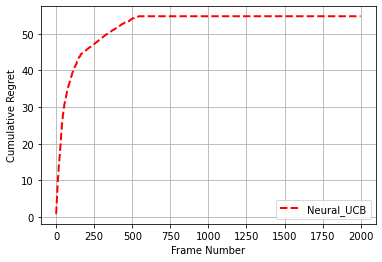

In [3]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0,2000,1)

# plt.title('g=3,d=2,k=100,N=100')
plt.plot(t, NeuralUCBregret_list[0:2000], color='red', label = 'Neural_UCB',linestyle="--",linewidth=2)
# plt.plot(t, regret_linucb_list, color='green', label = 'Linucb',linestyle="--",linewidth=2)
# plt.plot(t, regret_glinucb_list, color='blue', label = 'GLinucb',linestyle="--",linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('Frame Number')
plt.ylabel('Cumulative Regret')
# plt.savefig('g=3,d=2,k=100,N=100.png', format='png')
plt.show()


In [4]:
print(NeuralUCBregret_list)

[0.8268235367879645, 1.653647073575929, 1.687296264350779, 2.5141198011387433, 3.3409433379267077, 4.1677668747146726, 4.994590411502637, 5.821413948290601, 6.648237485078566, 7.47506102186653, 8.301884558654494, 9.128708095442459, 9.955531632230423, 10.782355169018388, 10.782355169018388, 11.609178705806352, 12.436002242594316, 13.26282577938228, 13.26282577938228, 14.089649316170245, 14.91647285295821, 15.0635530534117, 15.097202244186551, 15.924025780974516, 16.071105981428005, 16.218186181881496, 16.25183537265635, 16.634209916008896, 16.634209916008896, 16.781290116462387, 16.81493930723724, 16.81493930723724, 16.84858849801209, 16.84858849801209, 16.882237688786944, 16.882237688786944, 16.915886879561796, 16.94953607033665, 16.94953607033665, 16.9831852611115, 17.016834451886353, 17.050483642661206, 17.08413283343606, 17.11778202421091, 17.151431214985763, 17.185080405760615, 17.218729596535468, 17.25237878731032, 17.286027978085173, 17.319677168860025, 17.353326359634877, 17.386

# LinUCB 

In [8]:
linucb = LinUCB(2, len(X_n), beta=0.2, lamb=1)
# LinUCBregret = [0]

LinUCBregret = 0
LinUCBregret_list = []
LinUCBreward_list = []
LinUCBreward = 0

for i in range(10000):
#     context, reward = env.step()
    arm = linucb.take_action(context)
    print('i:',i)
#     while reward[arm] == 0.0:
#         arm = arm - 1
    print('reward[arm]:',reward[arm],'arm:',arm)
    X_t = np.random.choice([0,1],p=[1-reward[arm], reward[arm]])
#     X_t = random.choices([0, 1], weights=[1-reward[arm], reward[arm]], k=1)[0]
#     NeuralTSregret += [NeuralTSregret[-1] + max(reward) - reward[arm]]
    LinUCBregret = LinUCBregret +  max(reward) - reward[arm]
    LinUCBregret_list.append(LinUCBregret)
#     linucb.update(context, arm, reward[arm])
    linucb.update(context, arm, X_t)
    LinUCBreward += reward[arm]
    LinUCBreward_list.append(LinUCBreward)


# plt.plot(LinUCBregret, label='LinUCB')
# print('linucb:', LinUCBregret[-1])

i: 0
reward[arm]: 0.0 arm: 0
i: 1
reward[arm]: 0.0 arm: 8
i: 2
reward[arm]: 0.0 arm: 0
i: 3
reward[arm]: 0.0 arm: 8
i: 4
reward[arm]: 0.0 arm: 0
i: 5
reward[arm]: 0.0 arm: 8
i: 6
reward[arm]: 0.0 arm: 0
i: 7
reward[arm]: 0.0 arm: 8
i: 8
reward[arm]: 0.0 arm: 0
i: 9
reward[arm]: 0.0 arm: 8
i: 10
reward[arm]: 0.0 arm: 0
i: 11
reward[arm]: 0.0 arm: 8
i: 12
reward[arm]: 0.0 arm: 0
i: 13
reward[arm]: 0.0 arm: 8
i: 14
reward[arm]: 0.0 arm: 0
i: 15
reward[arm]: 0.0 arm: 8
i: 16
reward[arm]: 0.0 arm: 0
i: 17
reward[arm]: 0.0 arm: 8
i: 18
reward[arm]: 0.0 arm: 0
i: 19
reward[arm]: 0.0 arm: 8
i: 20
reward[arm]: 0.0 arm: 0
i: 21
reward[arm]: 0.0 arm: 8
i: 22
reward[arm]: 0.0 arm: 0
i: 23
reward[arm]: 0.0 arm: 8
i: 24
reward[arm]: 0.0 arm: 0
i: 25
reward[arm]: 0.0 arm: 8
i: 26
reward[arm]: 0.0 arm: 0
i: 27
reward[arm]: 0.0 arm: 8
i: 28
reward[arm]: 0.0 arm: 0
i: 29
reward[arm]: 0.0 arm: 8
i: 30
reward[arm]: 0.0 arm: 0
i: 31
reward[arm]: 0.0 arm: 8
i: 32
reward[arm]: 0.0 arm: 0
i: 33
reward[arm]: 0

i: 632
reward[arm]: 0.0 arm: 0
i: 633
reward[arm]: 0.0 arm: 8
i: 634
reward[arm]: 0.0 arm: 0
i: 635
reward[arm]: 0.0 arm: 8
i: 636
reward[arm]: 0.0 arm: 0
i: 637
reward[arm]: 0.0 arm: 8
i: 638
reward[arm]: 0.0 arm: 0
i: 639
reward[arm]: 0.0 arm: 8
i: 640
reward[arm]: 0.0 arm: 0
i: 641
reward[arm]: 0.0 arm: 8
i: 642
reward[arm]: 0.0 arm: 0
i: 643
reward[arm]: 0.0 arm: 8
i: 644
reward[arm]: 0.0 arm: 0
i: 645
reward[arm]: 0.0 arm: 8
i: 646
reward[arm]: 0.0 arm: 0
i: 647
reward[arm]: 0.0 arm: 8
i: 648
reward[arm]: 0.0 arm: 0
i: 649
reward[arm]: 0.0 arm: 8
i: 650
reward[arm]: 0.0 arm: 0
i: 651
reward[arm]: 0.0 arm: 8
i: 652
reward[arm]: 0.0 arm: 0
i: 653
reward[arm]: 0.0 arm: 8
i: 654
reward[arm]: 0.0 arm: 0
i: 655
reward[arm]: 0.0 arm: 8
i: 656
reward[arm]: 0.0 arm: 0
i: 657
reward[arm]: 0.0 arm: 8
i: 658
reward[arm]: 0.0 arm: 0
i: 659
reward[arm]: 0.0 arm: 8
i: 660
reward[arm]: 0.0 arm: 0
i: 661
reward[arm]: 0.0 arm: 8
i: 662
reward[arm]: 0.0 arm: 0
i: 663
reward[arm]: 0.0 arm: 8
i: 664
r

reward[arm]: 0.0 arm: 0
i: 1299
reward[arm]: 0.0 arm: 8
i: 1300
reward[arm]: 0.0 arm: 0
i: 1301
reward[arm]: 0.0 arm: 8
i: 1302
reward[arm]: 0.0 arm: 0
i: 1303
reward[arm]: 0.0 arm: 8
i: 1304
reward[arm]: 0.0 arm: 0
i: 1305
reward[arm]: 0.0 arm: 8
i: 1306
reward[arm]: 0.0 arm: 0
i: 1307
reward[arm]: 0.0 arm: 8
i: 1308
reward[arm]: 0.0 arm: 0
i: 1309
reward[arm]: 0.0 arm: 8
i: 1310
reward[arm]: 0.0 arm: 0
i: 1311
reward[arm]: 0.0 arm: 8
i: 1312
reward[arm]: 0.0 arm: 0
i: 1313
reward[arm]: 0.0 arm: 8
i: 1314
reward[arm]: 0.0 arm: 0
i: 1315
reward[arm]: 0.0 arm: 8
i: 1316
reward[arm]: 0.0 arm: 0
i: 1317
reward[arm]: 0.0 arm: 8
i: 1318
reward[arm]: 0.0 arm: 0
i: 1319
reward[arm]: 0.0 arm: 8
i: 1320
reward[arm]: 0.0 arm: 0
i: 1321
reward[arm]: 0.0 arm: 8
i: 1322
reward[arm]: 0.0 arm: 0
i: 1323
reward[arm]: 0.0 arm: 8
i: 1324
reward[arm]: 0.0 arm: 0
i: 1325
reward[arm]: 0.0 arm: 8
i: 1326
reward[arm]: 0.0 arm: 0
i: 1327
reward[arm]: 0.0 arm: 8
i: 1328
reward[arm]: 0.0 arm: 0
i: 1329
reward[a

i: 1965
reward[arm]: 0.0 arm: 8
i: 1966
reward[arm]: 0.0 arm: 0
i: 1967
reward[arm]: 0.0 arm: 8
i: 1968
reward[arm]: 0.0 arm: 0
i: 1969
reward[arm]: 0.0 arm: 8
i: 1970
reward[arm]: 0.0 arm: 0
i: 1971
reward[arm]: 0.0 arm: 8
i: 1972
reward[arm]: 0.0 arm: 0
i: 1973
reward[arm]: 0.0 arm: 8
i: 1974
reward[arm]: 0.0 arm: 0
i: 1975
reward[arm]: 0.0 arm: 8
i: 1976
reward[arm]: 0.0 arm: 0
i: 1977
reward[arm]: 0.0 arm: 8
i: 1978
reward[arm]: 0.0 arm: 0
i: 1979
reward[arm]: 0.0 arm: 8
i: 1980
reward[arm]: 0.0 arm: 0
i: 1981
reward[arm]: 0.0 arm: 8
i: 1982
reward[arm]: 0.0 arm: 0
i: 1983
reward[arm]: 0.0 arm: 8
i: 1984
reward[arm]: 0.0 arm: 0
i: 1985
reward[arm]: 0.0 arm: 8
i: 1986
reward[arm]: 0.0 arm: 0
i: 1987
reward[arm]: 0.0 arm: 8
i: 1988
reward[arm]: 0.0 arm: 0
i: 1989
reward[arm]: 0.0 arm: 8
i: 1990
reward[arm]: 0.0 arm: 0
i: 1991
reward[arm]: 0.0 arm: 8
i: 1992
reward[arm]: 0.0 arm: 0
i: 1993
reward[arm]: 0.0 arm: 8
i: 1994
reward[arm]: 0.0 arm: 0
i: 1995
reward[arm]: 0.0 arm: 8
i: 1996


reward[arm]: 0.0 arm: 8
i: 2632
reward[arm]: 0.0 arm: 0
i: 2633
reward[arm]: 0.0 arm: 8
i: 2634
reward[arm]: 0.0 arm: 0
i: 2635
reward[arm]: 0.0 arm: 8
i: 2636
reward[arm]: 0.0 arm: 0
i: 2637
reward[arm]: 0.0 arm: 8
i: 2638
reward[arm]: 0.0 arm: 0
i: 2639
reward[arm]: 0.0 arm: 8
i: 2640
reward[arm]: 0.0 arm: 0
i: 2641
reward[arm]: 0.0 arm: 8
i: 2642
reward[arm]: 0.0 arm: 0
i: 2643
reward[arm]: 0.0 arm: 8
i: 2644
reward[arm]: 0.0 arm: 0
i: 2645
reward[arm]: 0.0 arm: 8
i: 2646
reward[arm]: 0.0 arm: 0
i: 2647
reward[arm]: 0.0 arm: 8
i: 2648
reward[arm]: 0.0 arm: 0
i: 2649
reward[arm]: 0.0 arm: 8
i: 2650
reward[arm]: 0.0 arm: 0
i: 2651
reward[arm]: 0.0 arm: 8
i: 2652
reward[arm]: 0.0 arm: 0
i: 2653
reward[arm]: 0.0 arm: 8
i: 2654
reward[arm]: 0.0 arm: 0
i: 2655
reward[arm]: 0.0 arm: 8
i: 2656
reward[arm]: 0.0 arm: 0
i: 2657
reward[arm]: 0.0 arm: 8
i: 2658
reward[arm]: 0.0 arm: 0
i: 2659
reward[arm]: 0.0 arm: 8
i: 2660
reward[arm]: 0.0 arm: 0
i: 2661
reward[arm]: 0.0 arm: 8
i: 2662
reward[a

reward[arm]: 0.0 arm: 0
i: 3299
reward[arm]: 0.0 arm: 8
i: 3300
reward[arm]: 0.0 arm: 0
i: 3301
reward[arm]: 0.0 arm: 8
i: 3302
reward[arm]: 0.0 arm: 0
i: 3303
reward[arm]: 0.0 arm: 8
i: 3304
reward[arm]: 0.0 arm: 0
i: 3305
reward[arm]: 0.0 arm: 8
i: 3306
reward[arm]: 0.0 arm: 0
i: 3307
reward[arm]: 0.0 arm: 8
i: 3308
reward[arm]: 0.0 arm: 0
i: 3309
reward[arm]: 0.0 arm: 8
i: 3310
reward[arm]: 0.0 arm: 0
i: 3311
reward[arm]: 0.0 arm: 8
i: 3312
reward[arm]: 0.0 arm: 0
i: 3313
reward[arm]: 0.0 arm: 8
i: 3314
reward[arm]: 0.0 arm: 0
i: 3315
reward[arm]: 0.0 arm: 8
i: 3316
reward[arm]: 0.0 arm: 0
i: 3317
reward[arm]: 0.0 arm: 8
i: 3318
reward[arm]: 0.0 arm: 0
i: 3319
reward[arm]: 0.0 arm: 8
i: 3320
reward[arm]: 0.0 arm: 0
i: 3321
reward[arm]: 0.0 arm: 8
i: 3322
reward[arm]: 0.0 arm: 0
i: 3323
reward[arm]: 0.0 arm: 8
i: 3324
reward[arm]: 0.0 arm: 0
i: 3325
reward[arm]: 0.0 arm: 8
i: 3326
reward[arm]: 0.0 arm: 0
i: 3327
reward[arm]: 0.0 arm: 8
i: 3328
reward[arm]: 0.0 arm: 0
i: 3329
reward[a

reward[arm]: 0.0 arm: 0
i: 4049
reward[arm]: 0.0 arm: 8
i: 4050
reward[arm]: 0.0 arm: 0
i: 4051
reward[arm]: 0.0 arm: 8
i: 4052
reward[arm]: 0.0 arm: 0
i: 4053
reward[arm]: 0.0 arm: 8
i: 4054
reward[arm]: 0.0 arm: 0
i: 4055
reward[arm]: 0.0 arm: 8
i: 4056
reward[arm]: 0.0 arm: 0
i: 4057
reward[arm]: 0.0 arm: 8
i: 4058
reward[arm]: 0.0 arm: 0
i: 4059
reward[arm]: 0.0 arm: 8
i: 4060
reward[arm]: 0.0 arm: 0
i: 4061
reward[arm]: 0.0 arm: 8
i: 4062
reward[arm]: 0.0 arm: 0
i: 4063
reward[arm]: 0.0 arm: 8
i: 4064
reward[arm]: 0.0 arm: 0
i: 4065
reward[arm]: 0.0 arm: 8
i: 4066
reward[arm]: 0.0 arm: 0
i: 4067
reward[arm]: 0.0 arm: 8
i: 4068
reward[arm]: 0.0 arm: 0
i: 4069
reward[arm]: 0.0 arm: 8
i: 4070
reward[arm]: 0.0 arm: 0
i: 4071
reward[arm]: 0.0 arm: 8
i: 4072
reward[arm]: 0.0 arm: 0
i: 4073
reward[arm]: 0.0 arm: 8
i: 4074
reward[arm]: 0.0 arm: 0
i: 4075
reward[arm]: 0.0 arm: 8
i: 4076
reward[arm]: 0.0 arm: 0
i: 4077
reward[arm]: 0.0 arm: 8
i: 4078
reward[arm]: 0.0 arm: 0
i: 4079
reward[a

reward[arm]: 0.0 arm: 0
i: 4715
reward[arm]: 0.0 arm: 8
i: 4716
reward[arm]: 0.0 arm: 0
i: 4717
reward[arm]: 0.0 arm: 8
i: 4718
reward[arm]: 0.0 arm: 0
i: 4719
reward[arm]: 0.0 arm: 8
i: 4720
reward[arm]: 0.0 arm: 0
i: 4721
reward[arm]: 0.0 arm: 8
i: 4722
reward[arm]: 0.0 arm: 0
i: 4723
reward[arm]: 0.0 arm: 8
i: 4724
reward[arm]: 0.0 arm: 0
i: 4725
reward[arm]: 0.0 arm: 8
i: 4726
reward[arm]: 0.0 arm: 0
i: 4727
reward[arm]: 0.0 arm: 8
i: 4728
reward[arm]: 0.0 arm: 0
i: 4729
reward[arm]: 0.0 arm: 8
i: 4730
reward[arm]: 0.0 arm: 0
i: 4731
reward[arm]: 0.0 arm: 8
i: 4732
reward[arm]: 0.0 arm: 0
i: 4733
reward[arm]: 0.0 arm: 8
i: 4734
reward[arm]: 0.0 arm: 0
i: 4735
reward[arm]: 0.0 arm: 8
i: 4736
reward[arm]: 0.0 arm: 0
i: 4737
reward[arm]: 0.0 arm: 8
i: 4738
reward[arm]: 0.0 arm: 0
i: 4739
reward[arm]: 0.0 arm: 8
i: 4740
reward[arm]: 0.0 arm: 0
i: 4741
reward[arm]: 0.0 arm: 8
i: 4742
reward[arm]: 0.0 arm: 0
i: 4743
reward[arm]: 0.0 arm: 8
i: 4744
reward[arm]: 0.0 arm: 0
i: 4745
reward[a

reward[arm]: 0.0 arm: 8
i: 5382
reward[arm]: 0.0 arm: 0
i: 5383
reward[arm]: 0.0 arm: 8
i: 5384
reward[arm]: 0.0 arm: 0
i: 5385
reward[arm]: 0.0 arm: 8
i: 5386
reward[arm]: 0.0 arm: 0
i: 5387
reward[arm]: 0.0 arm: 8
i: 5388
reward[arm]: 0.0 arm: 0
i: 5389
reward[arm]: 0.0 arm: 8
i: 5390
reward[arm]: 0.0 arm: 0
i: 5391
reward[arm]: 0.0 arm: 8
i: 5392
reward[arm]: 0.0 arm: 0
i: 5393
reward[arm]: 0.0 arm: 8
i: 5394
reward[arm]: 0.0 arm: 0
i: 5395
reward[arm]: 0.0 arm: 8
i: 5396
reward[arm]: 0.0 arm: 0
i: 5397
reward[arm]: 0.0 arm: 8
i: 5398
reward[arm]: 0.0 arm: 0
i: 5399
reward[arm]: 0.0 arm: 8
i: 5400
reward[arm]: 0.0 arm: 0
i: 5401
reward[arm]: 0.0 arm: 8
i: 5402
reward[arm]: 0.0 arm: 0
i: 5403
reward[arm]: 0.0 arm: 8
i: 5404
reward[arm]: 0.0 arm: 0
i: 5405
reward[arm]: 0.0 arm: 8
i: 5406
reward[arm]: 0.0 arm: 0
i: 5407
reward[arm]: 0.0 arm: 8
i: 5408
reward[arm]: 0.0 arm: 0
i: 5409
reward[arm]: 0.0 arm: 8
i: 5410
reward[arm]: 0.0 arm: 0
i: 5411
reward[arm]: 0.0 arm: 8
i: 5412
reward[a

i: 6067
reward[arm]: 0.0 arm: 8
i: 6068
reward[arm]: 0.0 arm: 0
i: 6069
reward[arm]: 0.0 arm: 8
i: 6070
reward[arm]: 0.0 arm: 0
i: 6071
reward[arm]: 0.0 arm: 8
i: 6072
reward[arm]: 0.0 arm: 0
i: 6073
reward[arm]: 0.0 arm: 8
i: 6074
reward[arm]: 0.0 arm: 0
i: 6075
reward[arm]: 0.0 arm: 8
i: 6076
reward[arm]: 0.0 arm: 0
i: 6077
reward[arm]: 0.0 arm: 8
i: 6078
reward[arm]: 0.0 arm: 0
i: 6079
reward[arm]: 0.0 arm: 8
i: 6080
reward[arm]: 0.0 arm: 0
i: 6081
reward[arm]: 0.0 arm: 8
i: 6082
reward[arm]: 0.0 arm: 0
i: 6083
reward[arm]: 0.0 arm: 8
i: 6084
reward[arm]: 0.0 arm: 0
i: 6085
reward[arm]: 0.0 arm: 8
i: 6086
reward[arm]: 0.0 arm: 0
i: 6087
reward[arm]: 0.0 arm: 8
i: 6088
reward[arm]: 0.0 arm: 0
i: 6089
reward[arm]: 0.0 arm: 8
i: 6090
reward[arm]: 0.0 arm: 0
i: 6091
reward[arm]: 0.0 arm: 8
i: 6092
reward[arm]: 0.0 arm: 0
i: 6093
reward[arm]: 0.0 arm: 8
i: 6094
reward[arm]: 0.0 arm: 0
i: 6095
reward[arm]: 0.0 arm: 8
i: 6096
reward[arm]: 0.0 arm: 0
i: 6097
reward[arm]: 0.0 arm: 8
i: 6098


i: 6798
reward[arm]: 0.0 arm: 0
i: 6799
reward[arm]: 0.0 arm: 8
i: 6800
reward[arm]: 0.0 arm: 0
i: 6801
reward[arm]: 0.0 arm: 8
i: 6802
reward[arm]: 0.0 arm: 0
i: 6803
reward[arm]: 0.0 arm: 8
i: 6804
reward[arm]: 0.0 arm: 0
i: 6805
reward[arm]: 0.0 arm: 8
i: 6806
reward[arm]: 0.0 arm: 0
i: 6807
reward[arm]: 0.0 arm: 8
i: 6808
reward[arm]: 0.0 arm: 0
i: 6809
reward[arm]: 0.0 arm: 8
i: 6810
reward[arm]: 0.0 arm: 0
i: 6811
reward[arm]: 0.0 arm: 8
i: 6812
reward[arm]: 0.0 arm: 0
i: 6813
reward[arm]: 0.0 arm: 8
i: 6814
reward[arm]: 0.0 arm: 0
i: 6815
reward[arm]: 0.0 arm: 8
i: 6816
reward[arm]: 0.0 arm: 0
i: 6817
reward[arm]: 0.0 arm: 8
i: 6818
reward[arm]: 0.0 arm: 0
i: 6819
reward[arm]: 0.0 arm: 8
i: 6820
reward[arm]: 0.0 arm: 0
i: 6821
reward[arm]: 0.0 arm: 8
i: 6822
reward[arm]: 0.0 arm: 0
i: 6823
reward[arm]: 0.0 arm: 8
i: 6824
reward[arm]: 0.0 arm: 0
i: 6825
reward[arm]: 0.0 arm: 8
i: 6826
reward[arm]: 0.0 arm: 0
i: 6827
reward[arm]: 0.0 arm: 8
i: 6828
reward[arm]: 0.0 arm: 0
i: 6829


reward[arm]: 0.0 arm: 0
i: 7497
reward[arm]: 0.0 arm: 8
i: 7498
reward[arm]: 0.0 arm: 0
i: 7499
reward[arm]: 0.0 arm: 8
i: 7500
reward[arm]: 0.0 arm: 0
i: 7501
reward[arm]: 0.0 arm: 8
i: 7502
reward[arm]: 0.0 arm: 0
i: 7503
reward[arm]: 0.0 arm: 8
i: 7504
reward[arm]: 0.0 arm: 0
i: 7505
reward[arm]: 0.0 arm: 8
i: 7506
reward[arm]: 0.0 arm: 0
i: 7507
reward[arm]: 0.0 arm: 8
i: 7508
reward[arm]: 0.0 arm: 0
i: 7509
reward[arm]: 0.0 arm: 8
i: 7510
reward[arm]: 0.0 arm: 0
i: 7511
reward[arm]: 0.0 arm: 8
i: 7512
reward[arm]: 0.0 arm: 0
i: 7513
reward[arm]: 0.0 arm: 8
i: 7514
reward[arm]: 0.0 arm: 0
i: 7515
reward[arm]: 0.0 arm: 8
i: 7516
reward[arm]: 0.0 arm: 0
i: 7517
reward[arm]: 0.0 arm: 8
i: 7518
reward[arm]: 0.0 arm: 0
i: 7519
reward[arm]: 0.0 arm: 8
i: 7520
reward[arm]: 0.0 arm: 0
i: 7521
reward[arm]: 0.0 arm: 8
i: 7522
reward[arm]: 0.0 arm: 0
i: 7523
reward[arm]: 0.0 arm: 8
i: 7524
reward[arm]: 0.0 arm: 0
i: 7525
reward[arm]: 0.0 arm: 8
i: 7526
reward[arm]: 0.0 arm: 0
i: 7527
reward[a

reward[arm]: 0.0 arm: 0
i: 8215
reward[arm]: 0.0 arm: 8
i: 8216
reward[arm]: 0.0 arm: 0
i: 8217
reward[arm]: 0.0 arm: 8
i: 8218
reward[arm]: 0.0 arm: 0
i: 8219
reward[arm]: 0.0 arm: 8
i: 8220
reward[arm]: 0.0 arm: 0
i: 8221
reward[arm]: 0.0 arm: 8
i: 8222
reward[arm]: 0.0 arm: 0
i: 8223
reward[arm]: 0.0 arm: 8
i: 8224
reward[arm]: 0.0 arm: 0
i: 8225
reward[arm]: 0.0 arm: 8
i: 8226
reward[arm]: 0.0 arm: 0
i: 8227
reward[arm]: 0.0 arm: 8
i: 8228
reward[arm]: 0.0 arm: 0
i: 8229
reward[arm]: 0.0 arm: 8
i: 8230
reward[arm]: 0.0 arm: 0
i: 8231
reward[arm]: 0.0 arm: 8
i: 8232
reward[arm]: 0.0 arm: 0
i: 8233
reward[arm]: 0.0 arm: 8
i: 8234
reward[arm]: 0.0 arm: 0
i: 8235
reward[arm]: 0.0 arm: 8
i: 8236
reward[arm]: 0.0 arm: 0
i: 8237
reward[arm]: 0.0 arm: 8
i: 8238
reward[arm]: 0.0 arm: 0
i: 8239
reward[arm]: 0.0 arm: 8
i: 8240
reward[arm]: 0.0 arm: 0
i: 8241
reward[arm]: 0.0 arm: 8
i: 8242
reward[arm]: 0.0 arm: 0
i: 8243
reward[arm]: 0.0 arm: 8
i: 8244
reward[arm]: 0.0 arm: 0
i: 8245
reward[a

i: 8881
reward[arm]: 0.0 arm: 8
i: 8882
reward[arm]: 0.0 arm: 0
i: 8883
reward[arm]: 0.0 arm: 8
i: 8884
reward[arm]: 0.0 arm: 0
i: 8885
reward[arm]: 0.0 arm: 8
i: 8886
reward[arm]: 0.0 arm: 0
i: 8887
reward[arm]: 0.0 arm: 8
i: 8888
reward[arm]: 0.0 arm: 0
i: 8889
reward[arm]: 0.0 arm: 8
i: 8890
reward[arm]: 0.0 arm: 0
i: 8891
reward[arm]: 0.0 arm: 8
i: 8892
reward[arm]: 0.0 arm: 0
i: 8893
reward[arm]: 0.0 arm: 8
i: 8894
reward[arm]: 0.0 arm: 0
i: 8895
reward[arm]: 0.0 arm: 8
i: 8896
reward[arm]: 0.0 arm: 0
i: 8897
reward[arm]: 0.0 arm: 8
i: 8898
reward[arm]: 0.0 arm: 0
i: 8899
reward[arm]: 0.0 arm: 8
i: 8900
reward[arm]: 0.0 arm: 0
i: 8901
reward[arm]: 0.0 arm: 8
i: 8902
reward[arm]: 0.0 arm: 0
i: 8903
reward[arm]: 0.0 arm: 8
i: 8904
reward[arm]: 0.0 arm: 0
i: 8905
reward[arm]: 0.0 arm: 8
i: 8906
reward[arm]: 0.0 arm: 0
i: 8907
reward[arm]: 0.0 arm: 8
i: 8908
reward[arm]: 0.0 arm: 0
i: 8909
reward[arm]: 0.0 arm: 8
i: 8910
reward[arm]: 0.0 arm: 0
i: 8911
reward[arm]: 0.0 arm: 8
i: 8912


i: 9567
reward[arm]: 0.0 arm: 8
i: 9568
reward[arm]: 0.0 arm: 0
i: 9569
reward[arm]: 0.0 arm: 8
i: 9570
reward[arm]: 0.0 arm: 0
i: 9571
reward[arm]: 0.0 arm: 8
i: 9572
reward[arm]: 0.0 arm: 0
i: 9573
reward[arm]: 0.0 arm: 8
i: 9574
reward[arm]: 0.0 arm: 0
i: 9575
reward[arm]: 0.0 arm: 8
i: 9576
reward[arm]: 0.0 arm: 0
i: 9577
reward[arm]: 0.0 arm: 8
i: 9578
reward[arm]: 0.0 arm: 0
i: 9579
reward[arm]: 0.0 arm: 8
i: 9580
reward[arm]: 0.0 arm: 0
i: 9581
reward[arm]: 0.0 arm: 8
i: 9582
reward[arm]: 0.0 arm: 0
i: 9583
reward[arm]: 0.0 arm: 8
i: 9584
reward[arm]: 0.0 arm: 0
i: 9585
reward[arm]: 0.0 arm: 8
i: 9586
reward[arm]: 0.0 arm: 0
i: 9587
reward[arm]: 0.0 arm: 8
i: 9588
reward[arm]: 0.0 arm: 0
i: 9589
reward[arm]: 0.0 arm: 8
i: 9590
reward[arm]: 0.0 arm: 0
i: 9591
reward[arm]: 0.0 arm: 8
i: 9592
reward[arm]: 0.0 arm: 0
i: 9593
reward[arm]: 0.0 arm: 8
i: 9594
reward[arm]: 0.0 arm: 0
i: 9595
reward[arm]: 0.0 arm: 8
i: 9596
reward[arm]: 0.0 arm: 0
i: 9597
reward[arm]: 0.0 arm: 8
i: 9598


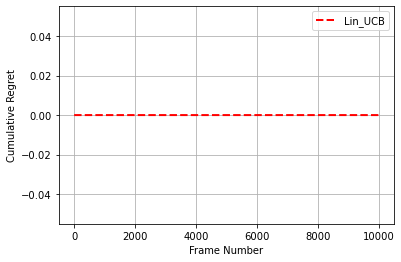

In [9]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0,10000,1)

# plt.title('g=3,d=2,k=100,N=100')
plt.plot(t, LinUCBreward_list[0:10000], color='red', label = 'Lin_UCB',linestyle="--",linewidth=2)
# plt.plot(t, regret_linucb_list, color='green', label = 'Linucb',linestyle="--",linewidth=2)
# plt.plot(t, regret_glinucb_list, color='blue', label = 'GLinucb',linestyle="--",linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('Frame Number')
plt.ylabel('Cumulative Regret')
# plt.savefig('g=3,d=2,k=100,N=100.png', format='png')
plt.show()


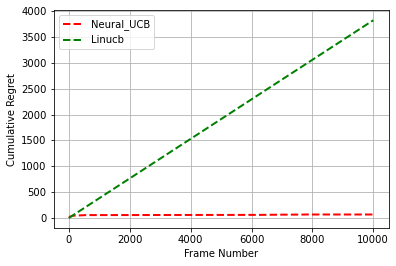

In [6]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0,10000,1)

# plt.title('g=3,d=2,k=100,N=100')
plt.plot(t, NeuralUCBregret_list[0:10000], color='red', label = 'Neural_UCB',linestyle="--",linewidth=2)
plt.plot(t, LinUCBregret_list[0:10000], color='green', label = 'Linucb',linestyle="--",linewidth=2)
# plt.plot(t, regret_glinucb_list, color='blue', label = 'GLinucb',linestyle="--",linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('Frame Number')
plt.ylabel('Cumulative Regret')
# plt.savefig('g=3,d=2,k=100,N=100.png', format='png')
plt.show()


# route 3

In [49]:
def get_reward(X_n):
    A = 4000
    reward = []

    # 繁忙时期 qubit较少 a>b>c>d

    # route a, 1 hop, 2 edges
    # 单跳单qubit单次纠缠成功率
    pe_c_1 = 2e-4
    pe_c_2 = 2e-4
    pe_c_3 = 2e-4
    # 单跳单qubit单slot(A次)纠缠成功率
    p_c_1 = 1 - (1 - pe_c_1)**A
    p_c_2 = 1 - (1 - pe_c_2)**A
    p_c_3 = 1 - (1 - pe_c_3)**A
#     # 单跳qubit数量
#     n_a_1 = 4
#     n_a_2 = 4
    # 单跳成功率
    for j in range(len(X_n)):
#         P_a_1 = 1 - (1 - p_a_1)**n_a_1
#         P_a_2 = 1 - (1 - p_a_2)**n_a_2
        P_c_1 = 1 - (1 - p_c_1)**X_n[j][0]
        P_c_2 = 1 - (1 - p_c_2)**X_n[j][1]
        P_c_3 = 1 - (1 - p_c_3)**X_n[j][2]
        # route a 成功率
        P_c = P_c_1 * P_c_2 * P_c_3
        reward.append(P_c)
    return reward

In [50]:
from env import *
from neuralucb import *
import matplotlib.pyplot as plt
import torch
from tqdm import trange
import random

X_n = []
qubit = 8
for i in range(qubit+1):
    for j in range(qubit+1-i):
        new_d = np.array([i,j,qubit-i-j])
        X_n.append(new_d)
X_n = np.array(X_n)

# for i in range(3):
#     front = np.zeros((4 * i))
#     back = np.zeros((4 * (2 - i)))
#     new_d = np.concatenate((front, x, back), axis=0)
#     X_n.append(new_d)
# X_n = np.array(X_n)

neuralucb = NeuralUCB(3, len(X_n), beta=1, lamb=1)
NeuralUCBregret_list = []
NeuralUCBregret = 0
# NeuralTSregret = [0]

context = X_n
reward = get_reward(X_n)
print('max:',max(reward),'id:',reward.index(max(reward)),'max_stra:',X_n[reward.index(max(reward))])
print(X_n)
print(reward)
for i in trange(10000):
#     context, reward = env.step()
    arm = neuralucb.take_action(context)
#     X_t = np.random.binomial(1, reward[arm])
    X_t = np.random.choice([0,1],p=[1-reward[arm], reward[arm]])
#     X_t = random.choices([0, 1], weights=[1-reward[arm], reward[arm]], k=1)[0]
#     NeuralTSregret += [NeuralTSregret[-1] + max(reward) - reward[arm]]
    NeuralUCBregret = NeuralUCBregret +  max(reward) - reward[arm]
    NeuralUCBregret_list.append(NeuralUCBregret)
#     neuralucb.update(context, arm, reward[arm])
    neuralucb.update(context, arm, X_t)


# plt.plot(NeuralUCBregret, label='NeuralUCB')
# print('neuralucb:', NeuralUCBregret[-1])

max: 0.6599253551504429 id: 20 max_stra: [2 3 3]
[[0 0 8]
 [0 1 7]
 [0 2 6]
 [0 3 5]
 [0 4 4]
 [0 5 3]
 [0 6 2]
 [0 7 1]
 [0 8 0]
 [1 0 7]
 [1 1 6]
 [1 2 5]
 [1 3 4]
 [1 4 3]
 [1 5 2]
 [1 6 1]
 [1 7 0]
 [2 0 6]
 [2 1 5]
 [2 2 4]
 [2 3 3]
 [2 4 2]
 [2 5 1]
 [2 6 0]
 [3 0 5]
 [3 1 4]
 [3 2 3]
 [3 3 2]
 [3 4 1]
 [3 5 0]
 [4 0 4]
 [4 1 3]
 [4 2 2]
 [4 3 1]
 [4 4 0]
 [5 0 3]
 [5 1 2]
 [5 2 1]
 [5 3 0]
 [6 0 2]
 [6 1 1]
 [6 2 0]
 [7 0 1]
 [7 1 0]
 [8 0 0]]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30078347910553993, 0.4314917366284491, 0.48035441712799143, 0.4803544171279914, 0.4314917366284491, 0.3007834791055399, 0.0, 0.0, 0.4314917366284491, 0.6110626746509006, 0.6599253551504429, 0.6110626746509006, 0.4314917366284491, 0.0, 0.0, 0.48035441712799143, 0.6599253551504429, 0.6599253551504429, 0.4803544171279914, 0.0, 0.0, 0.4803544171279914, 0.6110626746509006, 0.4803544171279914, 0.0, 0.0, 0.4314917366284491, 0.4314917366284491, 0.0, 0.0, 0.3007834791055399, 0.0, 0.0, 0.0, 0.0]


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:16<00:00, 38.92it/s]


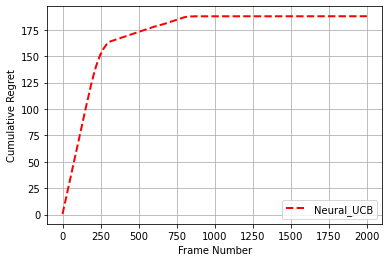

In [51]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0,2000,1)

# plt.title('g=3,d=2,k=100,N=100')
plt.plot(t, NeuralUCBregret_list[0:2000], color='red', label = 'Neural_UCB',linestyle="--",linewidth=2)
# plt.plot(t, regret_linucb_list, color='green', label = 'Linucb',linestyle="--",linewidth=2)
# plt.plot(t, regret_glinucb_list, color='blue', label = 'GLinucb',linestyle="--",linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('Frame Number')
plt.ylabel('Cumulative Regret')
# plt.savefig('g=3,d=2,k=100,N=100.png', format='png')
plt.show()


In [52]:
linucb = LinUCB(3, len(X_n), beta=0.2, lamb=1)
# LinUCBregret = [0]

LinUCBregret = 0
LinUCBregret_list = []

for i in range(10000):
#     context, reward = env.step()
    arm = linucb.take_action(context)
    X_t = np.random.choice([0,1],p=[1-reward[arm], reward[arm]])
#     X_t = random.choices([0, 1], weights=[1-reward[arm], reward[arm]], k=1)[0]
#     NeuralTSregret += [NeuralTSregret[-1] + max(reward) - reward[arm]]
    LinUCBregret = LinUCBregret +  max(reward) - reward[arm]
    LinUCBregret_list.append(LinUCBregret)
#     linucb.update(context, arm, reward[arm])
    linucb.update(context, arm, X_t)


# plt.plot(LinUCBregret, label='LinUCB')
# print('linucb:', LinUCBregret[-1])

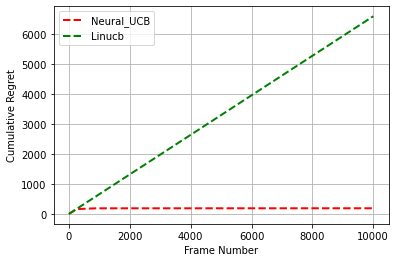

In [53]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0,10000,1)

# plt.title('g=3,d=2,k=100,N=100')
plt.plot(t, NeuralUCBregret_list[0:10000], color='red', label = 'Neural_UCB',linestyle="--",linewidth=2)
plt.plot(t, LinUCBregret_list[0:10000], color='green', label = 'Linucb',linestyle="--",linewidth=2)
# plt.plot(t, regret_glinucb_list, color='blue', label = 'GLinucb',linestyle="--",linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('Frame Number')
plt.ylabel('Cumulative Regret')
# plt.savefig('g=3,d=2,k=100,N=100.png', format='png')
plt.show()
